In [5]:
using Random
Random.seed!(1234)

TaskLocalRNG()

In [6]:
coins = rand(Bool, 100)

100-element Vector{Bool}:
 1
 0
 0
 1
 1
 1
 1
 1
 0
 1
 ⋮
 1
 0
 1
 1
 1
 0
 1
 0
 1

In [7]:
sum(coins)

58

In [8]:
coins3 = rand(Bool,100,3)

100×3 Matrix{Bool}:
 1  1  0
 0  0  1
 1  0  0
 0  1  1
 0  1  1
 0  1  0
 1  0  1
 0  0  1
 1  0  0
 0  0  0
 ⋮     
 1  0  1
 0  0  1
 0  0  1
 0  1  0
 1  1  0
 0  1  0
 0  1  0
 0  1  1
 0  1  0

In [9]:
num_heads = mapslices(sum,coins3;dims=[2])

100×1 Matrix{Int64}:
 2
 1
 1
 2
 2
 1
 2
 1
 1
 0
 ⋮
 2
 1
 1
 1
 2
 1
 1
 2
 1

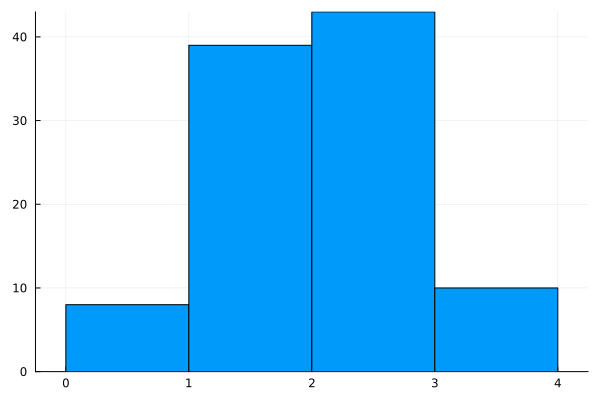

In [10]:
using Plots
histogram(num_heads, nbins = 4, legend = false)

In [11]:
savefig("../assets/plots/prob-models/coins3.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/coins3.png"

In [13]:
using StatsBase

In [14]:
dice_count = counts(num_heads,0:3)

4-element Vector{Int64}:
  8
 39
 43
 10

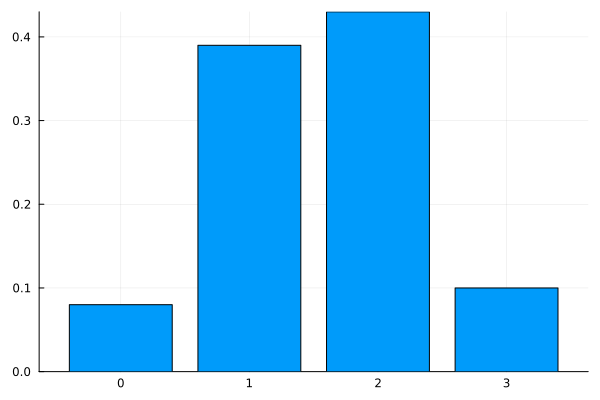

In [15]:
bar(0:3,dice_count/sum(dice_count),legend=false)

In [16]:
savefig("../assets/plots/prob-models/coins3-improved.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/coins3-improved.png"

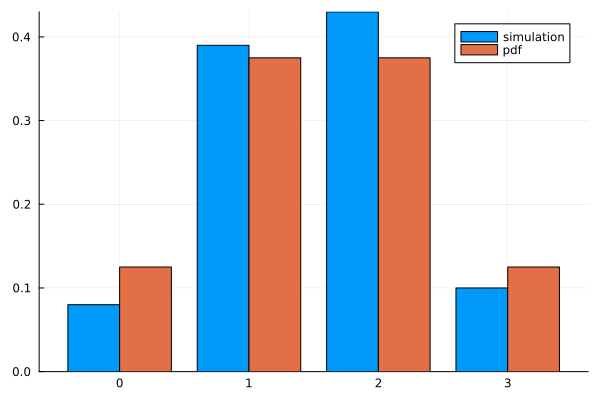

In [17]:
using StatsPlots
groupedbar(0:3,hcat(dice_count/sum(dice_count), [1/8,3/8,3/8,1/8]), label=["simulation" "pdf"])

In [18]:
savefig("../assets/plots/prob-models/coins3-compare.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/coins3-compare.png"

In [19]:
S100 = rand(1:6, 100)

100-element Vector{Int64}:
 5
 4
 5
 1
 2
 3
 5
 6
 4
 6
 ⋮
 3
 3
 1
 5
 2
 5
 4
 2
 5

In [21]:
p = count(a-> a==3, rand(1:6, 1_000))

190

In [22]:
p/1_000

0.19

In [23]:
dice2 = rand(1:6, 10_000,2)

10000×2 Matrix{Int64}:
 5  1
 2  5
 4  2
 5  2
 6  3
 1  1
 5  6
 1  3
 5  3
 4  3
 ⋮  
 4  1
 2  1
 2  5
 3  1
 4  6
 1  6
 6  4
 2  1
 1  2

In [24]:
dsum = mapslices(sum, dice2; dims=[2])

10000×1 Matrix{Int64}:
  6
  7
  6
  7
  9
  2
 11
  4
  8
  7
  ⋮
  5
  3
  7
  4
 10
  7
 10
  3
  3

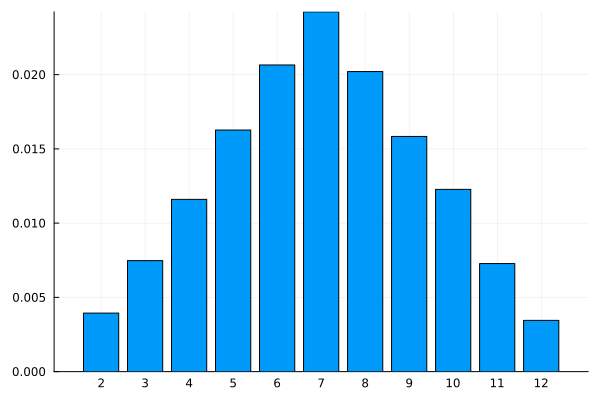

In [26]:
bar(2:12, counts(dsum,2:12)/sum(dsum), legend= false, xticks=2:12)

In [27]:
savefig("../assets/plots/prob-models/dice2.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/dice2.png"

In [28]:
function nextToEachOther(names::Vector{String})
  a = findfirst(name -> name=="Alisha",names)
  m = findfirst(name -> name=="Mary",names)
  abs(a-m) == 1 || abs(a-m) == length(names)-1
end

nextToEachOther (generic function with 1 method)

In [29]:
nextToEachOther(["Alisha", "Mary", "p1", "p2", "p3", "p4", "p5"])

true

In [30]:
nextToEachOther(["Alisha", "p1", "Mary", "p2", "p3", "p4", "p5"])

false

In [31]:
nextToEachOther(["Alisha","p1", "p2", "p3", "p4", "p5", "Mary"])

true

In [36]:
table_names = ["Alisha", "Mary", "p1", "p2", "p3", "p4", "p5"]

7-element Vector{String}:
 "Alisha"
 "Mary"
 "p1"
 "p2"
 "p3"
 "p4"
 "p5"

In [37]:
shuffle(table_names)

7-element Vector{String}:
 "p3"
 "Alisha"
 "Mary"
 "p5"
 "p2"
 "p4"
 "p1"

In [38]:
join(shuffle(table_names)," ")

"p1 p2 p4 p3 p5 Alisha Mary"

In [39]:
function numTimes(trials::Integer)
  s = 0  # keeps track of how many times they sit next to each other
  for i=1:trials
    if nextToEachOther(shuffle(table_names))
      s += 1
    end
  end
  s/trials
end

numTimes (generic function with 1 method)

In [41]:
numTimes(10_000)

0.3303

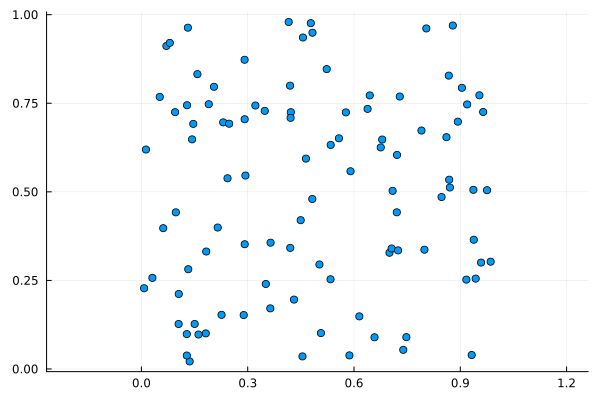

In [42]:
pts=rand(100,2)
scatter(pts[:,1],pts[:,2], aspect_ratio=:equal, legend=false)

In [43]:
savefig("../assets/plots/prob-models/circle100.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/circle100.png"

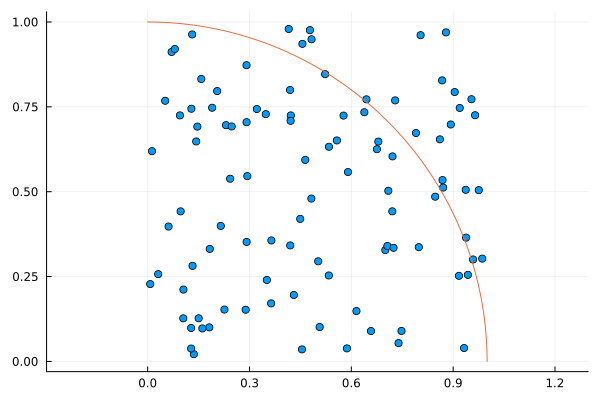

In [44]:
scatter(pts[:,1],pts[:,2], aspect_ratio=:equal, legend=false)
plot!(cos,sin,0,pi/2)

In [45]:
savefig("../assets/plots/prob-models/circle100a.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/prob-models/circle100a.png"

In [47]:
dist=mapslices(pt->sqrt(pt[1]^2+pt[2]^2),pts;dims=[2])

100×1 Matrix{Float64}:
 0.2279692656807401
 0.773199634517351
 0.8456191614778843
 0.8571109704744027
 1.2531196424372795
 0.19681210029531732
 0.8691437098533176
 0.45600341919577453
 1.3084843217002824
 0.9144494085670675
 ⋮
 0.8668813287904954
 0.9030222561878666
 1.0648375395488778
 0.1336037655713033
 1.1844540257027334
 0.827846195243949
 1.0868663036636106
 0.16159094333269802
 0.18817304157546466

In [50]:
numpts = count(d -> d < 1, dist)

77

In [52]:
4* numpts/100

3.08

In [53]:
function calcPi(total_points::Integer)
  pts=rand(total_points,2)
  dist=mapslices(pt -> pt[1]^2+pt[2]^2,pts;dims=[2])
  4*count(d -> d < 1,dist)/total_points
end


calcPi (generic function with 1 method)

In [54]:
calcPi(10_000)

3.1632